# Step 1: Initialise
1. Load the packages
2. Change directory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
import os
from h2o.estimators.random_forest import H2ORandomForestEstimator
from matplotlib.pyplot import xticks
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# os.chdir('C:/Users/u010940/OneDrive - Personal/OneDrive/Documents/Coding/Kaggle/House Price/')
os.chdir('C:/Users/bhave/OneDrive/Documents/Coding/Kaggle/House Price')



In [47]:
#load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train['source']='train'
test['SalePrice']=np.NaN
test['source']='test'

data = train.append(test)
data.index = np.arange(1, len(data) + 1)

del train,test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
1,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
3,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
4,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
5,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
6,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,train
7,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,train
8,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,train
9,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,train
10,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0,train


# Data Analysis

## Inital RF To determine the important variables to look at

In [ ]:
h2o.init()

In [ ]:
# Split data into Training & Test/Crossvalid
train_hex = h2o.H2OFrame(data[data['source']=='train'])
X_train_hex, X_valid_hex = train_hex.split_frame([0.7], seed=1234)

In [ ]:
# Define model
h2o_rf = H2ORandomForestEstimator(ntrees=200, max_depth=20, nfolds=10)

In [ ]:
X_names=list(train_hex.columns)
X_names.remove('Id')
X_names.remove('SalePrice')

In [ ]:
# Train model
h2o_rf.train(x=X_names,
             y='SalePrice',
             training_frame=X_train_hex,
             validation_frame=X_valid_hex)


In [ ]:
h2o_rf.varimp_plot(num_of_features = 20)

In [ ]:
del X_train, X_test, X_names, h2o_rf

In [ ]:
h2o.shutdown()

# EDA - Analysisng each variable

### Null Values

In [49]:
# Let's display columns with more than 0 null values
null_cols = []
for col in data.columns:
    if data[data['source']=='train'][col].isnull().sum() > 0 :
        print("Column",col, "has", data[data['source']=='train'][col].isnull().sum(),"null values")    
        null_cols.append(col)
        
# looking at the data dictionary, we know that these are not actually null values, these actually values representing 
# that particular feature is not present in the house


Column LotFrontage has 259 null values
Column Alley has 1369 null values
Column MasVnrType has 8 null values
Column MasVnrArea has 8 null values
Column BsmtQual has 37 null values
Column BsmtCond has 37 null values
Column BsmtExposure has 38 null values
Column BsmtFinType1 has 37 null values
Column BsmtFinType2 has 38 null values
Column Electrical has 1 null values
Column FireplaceQu has 690 null values
Column GarageType has 81 null values
Column GarageYrBlt has 81 null values
Column GarageFinish has 81 null values
Column GarageQual has 81 null values
Column GarageCond has 81 null values
Column PoolQC has 1453 null values
Column Fence has 1179 null values
Column MiscFeature has 1406 null values


There's some clear evidence that certain variables having a null should be kept

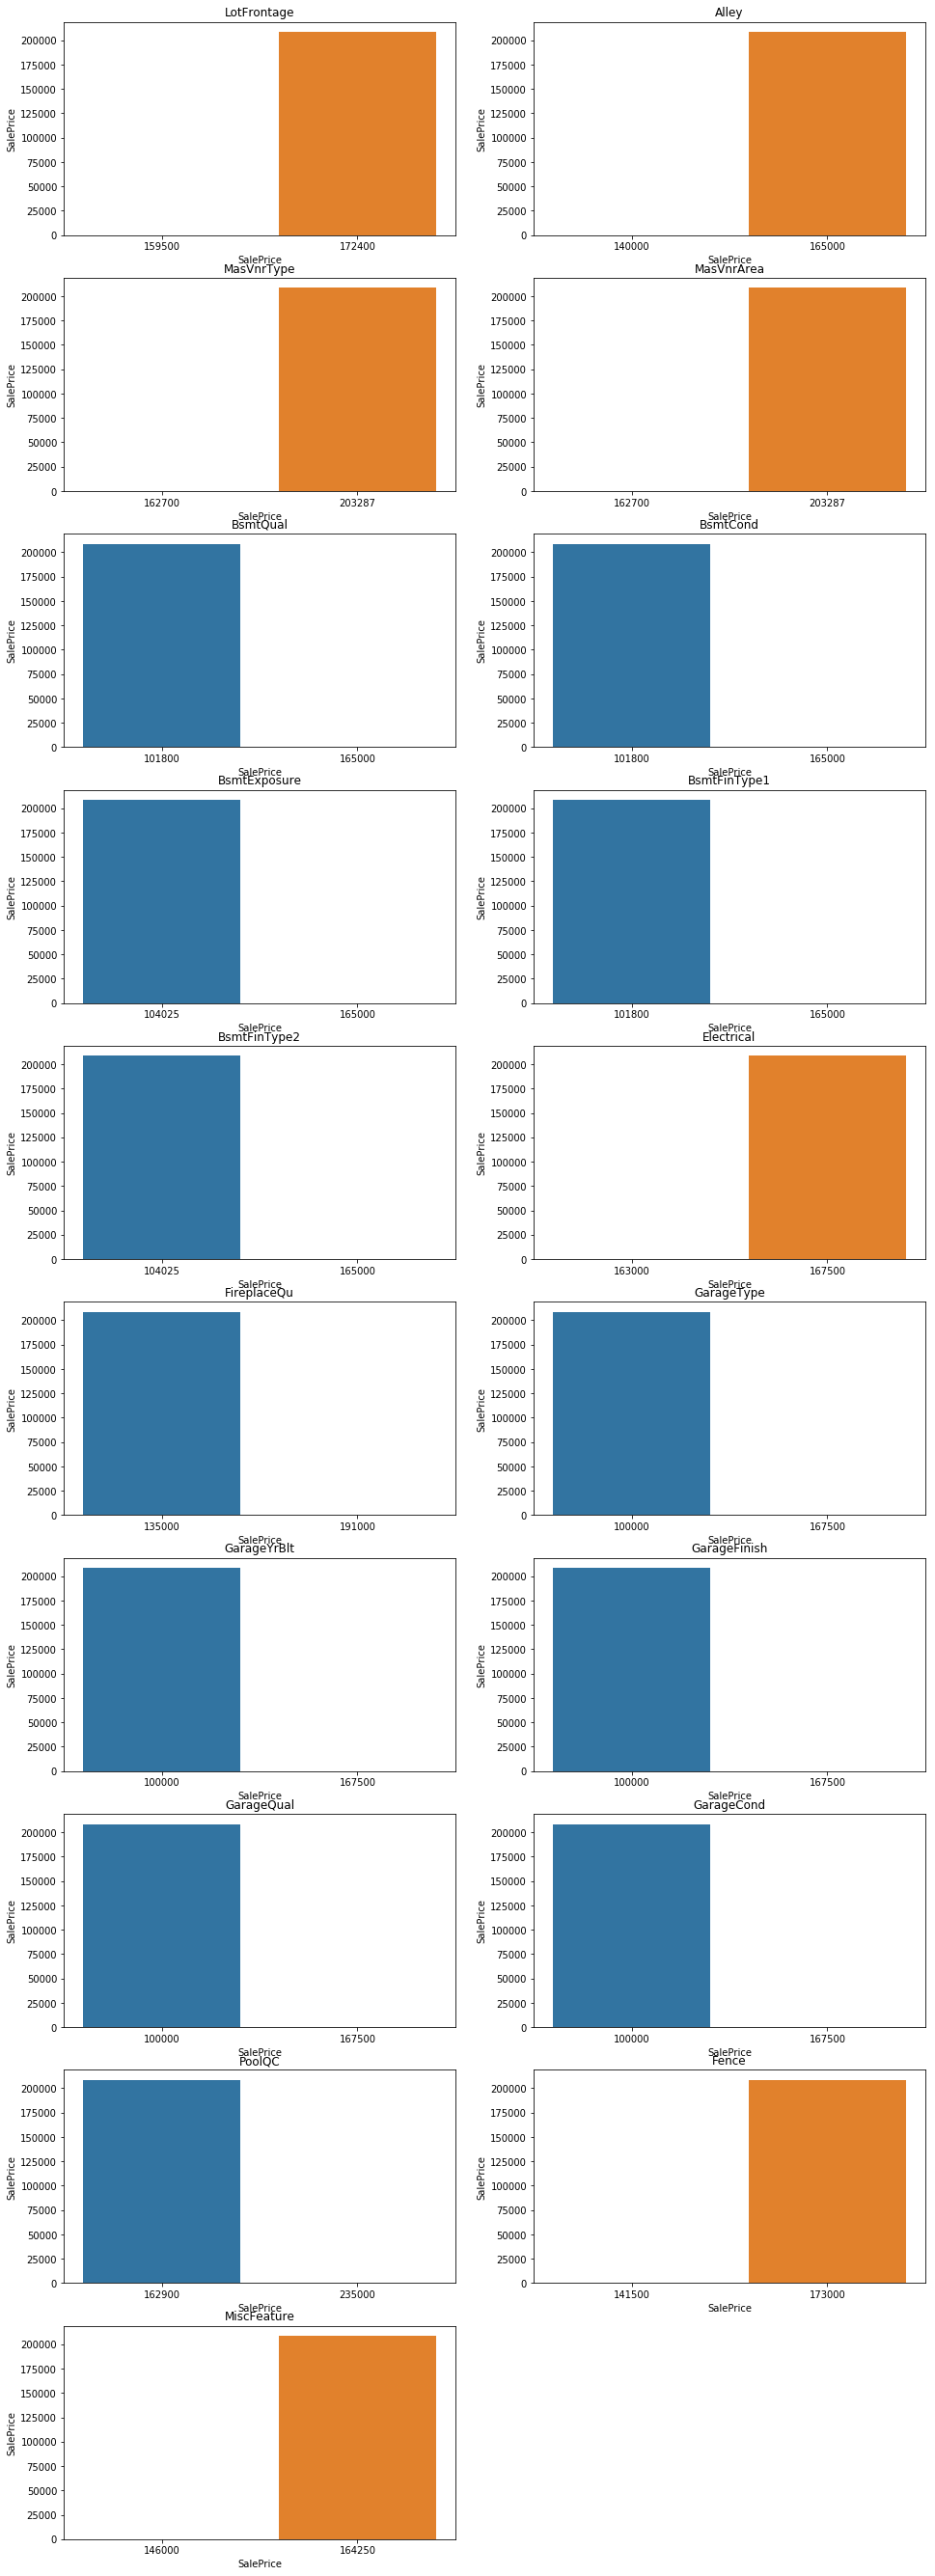

In [50]:
# lets check if these null values actually have any relation with the target variable


house_eda = data[data['source']=='train'].copy()
house_eda['SalePrice'] = house_eda.SalePrice.astype(int)

for col in null_cols:
    house_eda[col] = np.where(house_eda[col].isnull(), 1, 0).astype(int)  

# lets see if these null values have to do anything with the sales price
plt.figure(figsize = (16,48))
for idx,col in enumerate(null_cols):
    plt.subplot(10,2,idx+1)
    fig = sns.barplot(x = house_eda.groupby(col)["SalePrice"].median(),y =house_eda["SalePrice"])
    fig.set(title=col)
plt.show()


In [51]:
#missing data
total = data[data['source']=='train'].isnull().sum().sort_values(ascending=False)
percent = (data[data['source']=='train'].isnull().sum()/data[data['source']=='train'].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [52]:

#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 100]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max() #just checking that there's no missing data missing...



1459

### Numerical Data can be split into discrete and continuous

In [53]:
# Create List of categorical and numerical colums 
# We will use these to plot many box plots (categorical) and scatter plots (numerical)
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans

cols=list(data.columns)
num_cols = list(data._get_numeric_data().columns)
num_cols.remove('MSSubClass')
cat_cols = setdiff_sorted(cols,num_cols)

num_cols.remove('Id')
num_cols.remove('SalePrice')
num_cols_disc = [
    'BedroomAbvGr',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'Fireplaces',
    'GarageCars',
    'HalfBath',
    'KitchenAbvGr',
    'MoSold',
    'OverallCond',
    'OverallQual',
    'TotRmsAbvGrd',
    'YrSold'
]
num_cols_cont=setdiff_sorted(num_cols,num_cols_disc)

In [54]:
data['ExterQual'] = data['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data['ExterCond'] = data['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data['BsmtQual'] = data['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
data['BsmtCond'] = data['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data['CentralAir'] = data['CentralAir'].map({'N':0,'Y':1})
data['KitchenQual'] = data['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data['GarageQual'] = data['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
# data['FireplaceQu'] = data['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
data['GarageCond'] = data['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})


In [55]:
missing_cols = setdiff_sorted(setdiff_sorted(setdiff_sorted(cols,num_cols_cont),num_cols_disc),cat_cols)
missing_cols

['Id', 'SalePrice']

## Categorical Variables

### Ordinal

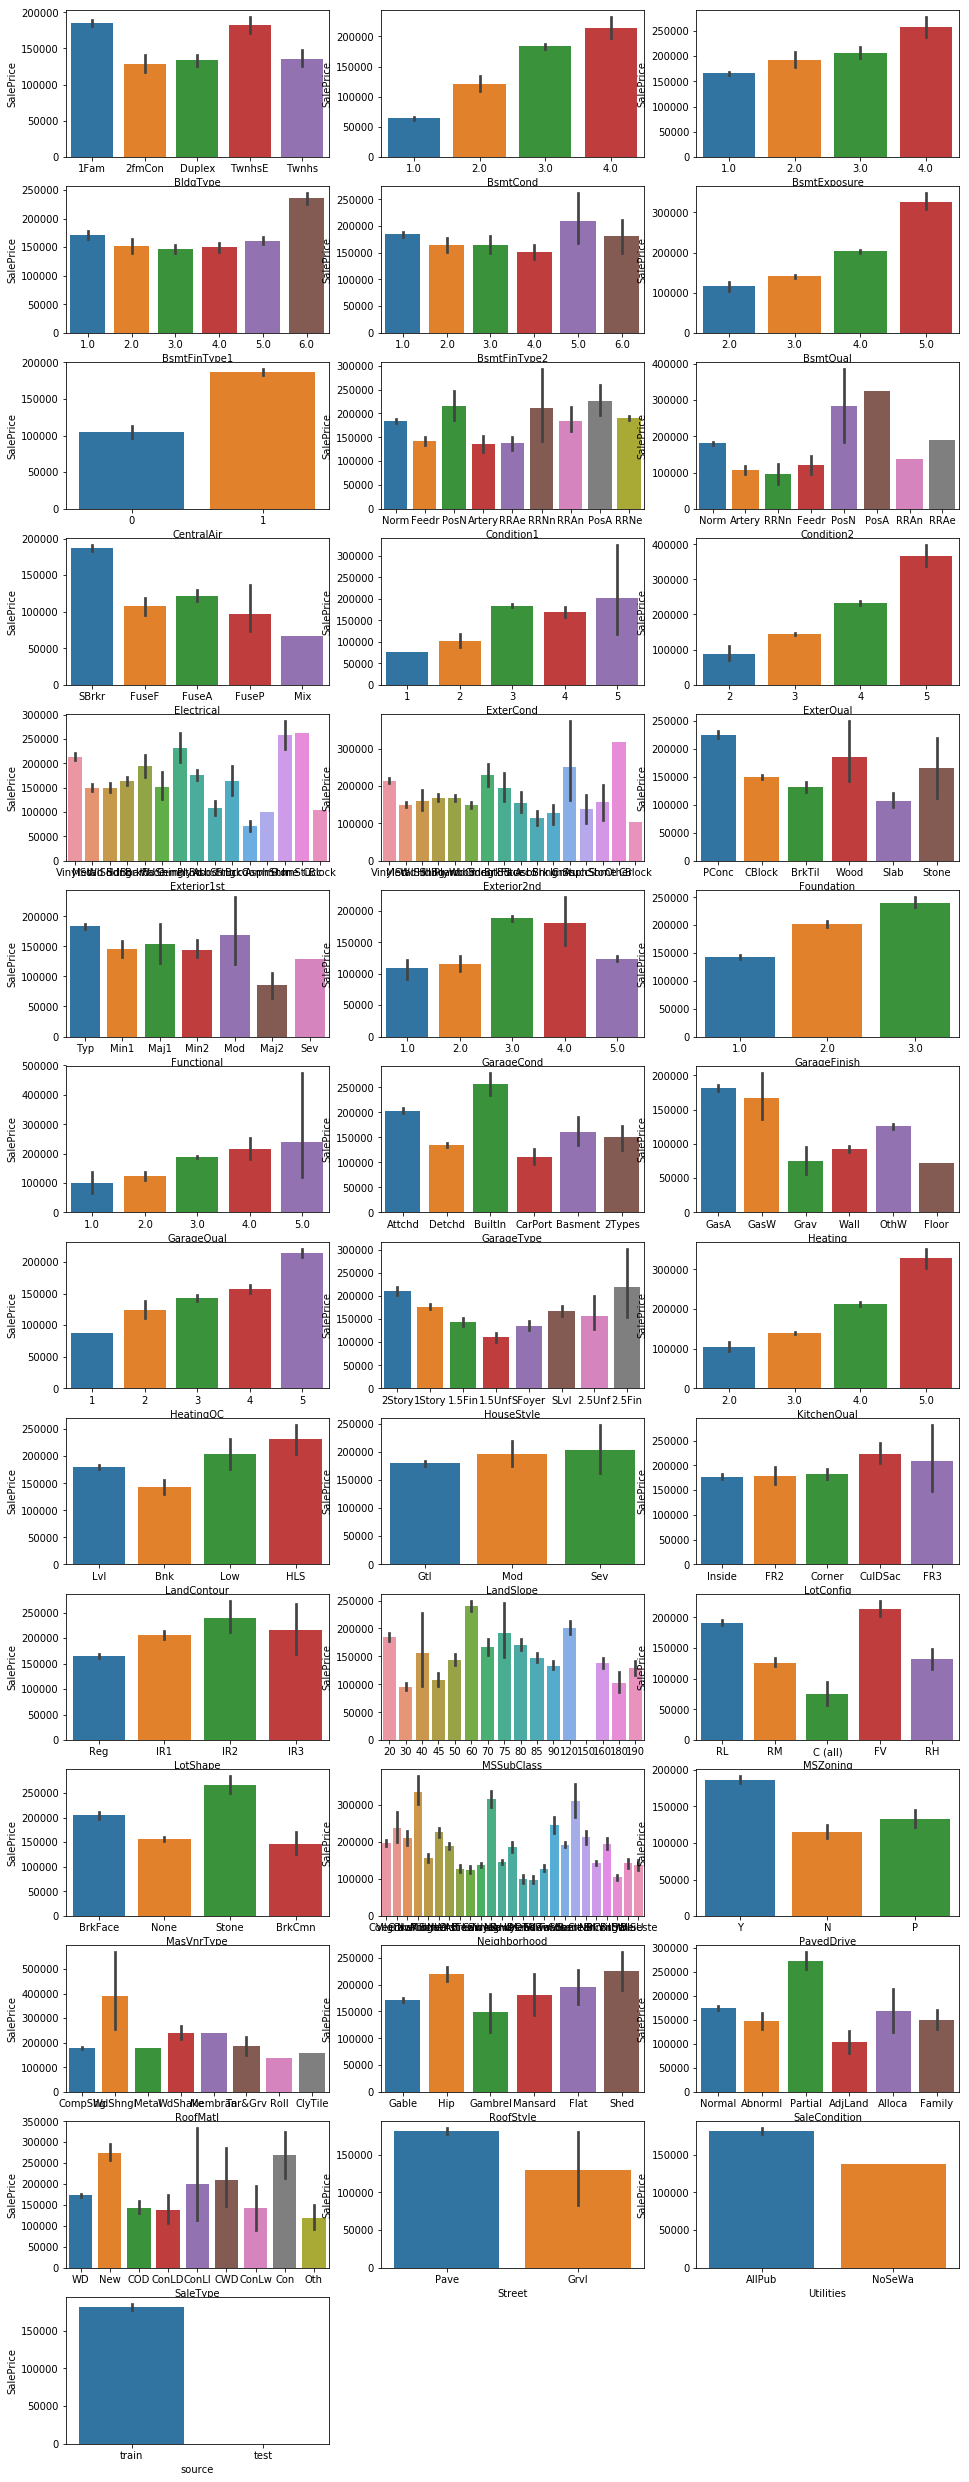

In [56]:
plt.figure(figsize = (16,48))
for idx,col in enumerate(cat_cols):
    plt.subplot(15,3,idx+1)
    sns.barplot(x=data[col], y=data['SalePrice'])
plt.show()


## Numerical Variable

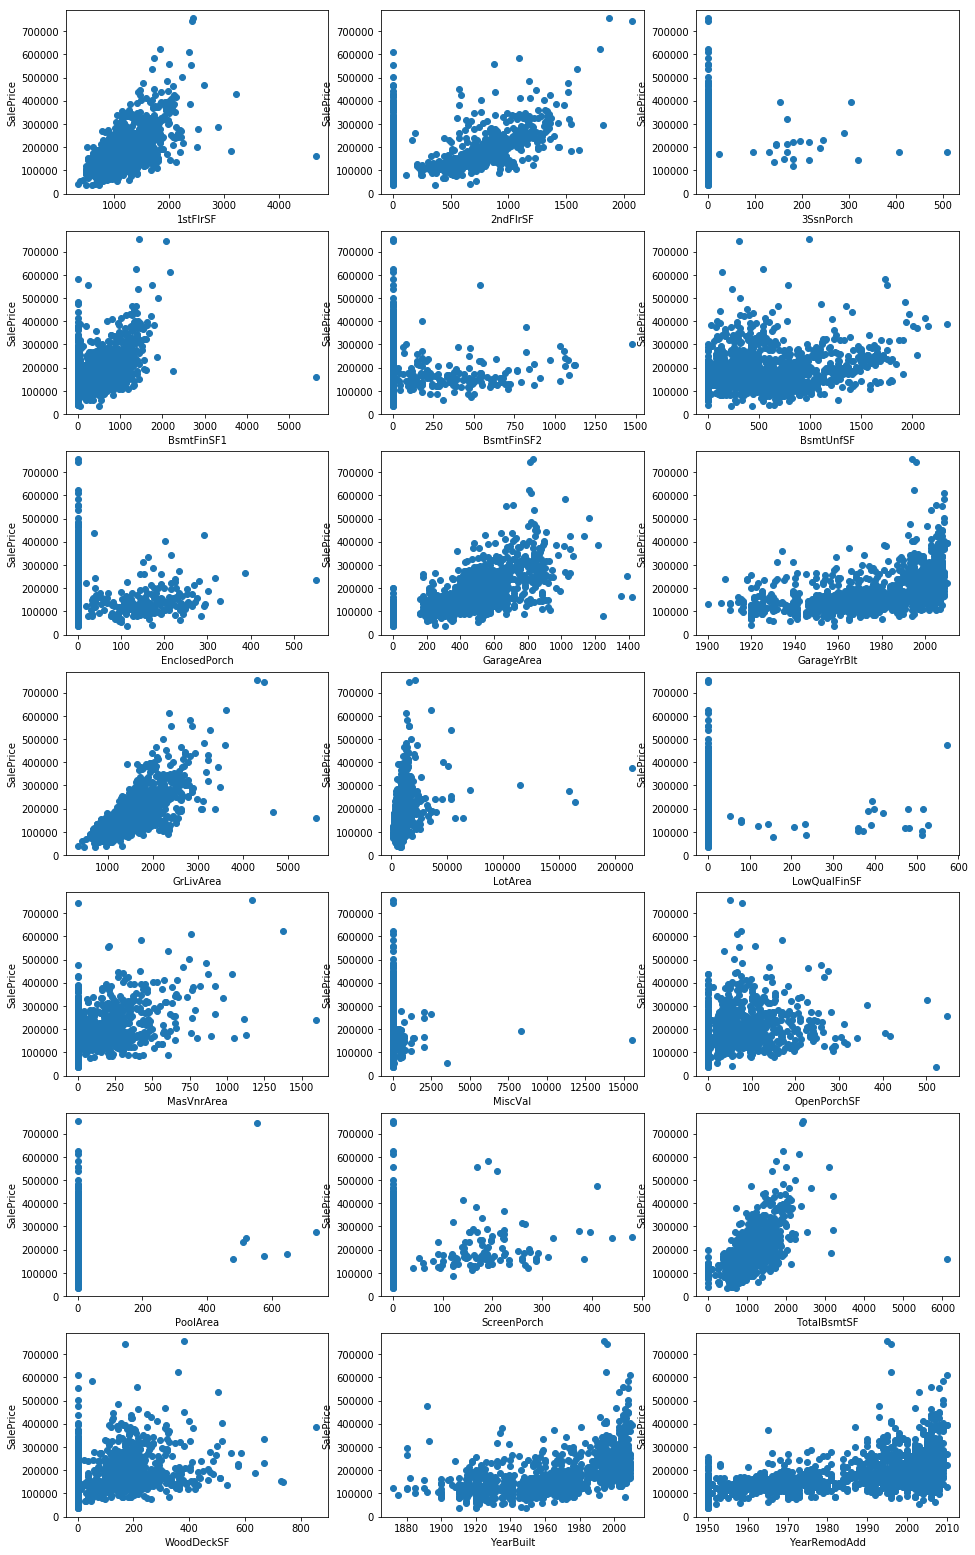

In [57]:
plt.figure(figsize=(16,48))
for idx,col in enumerate(num_cols_cont):
    plt.subplot(12,3,idx+1)
    plt.scatter(x = data[col],y=data["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)

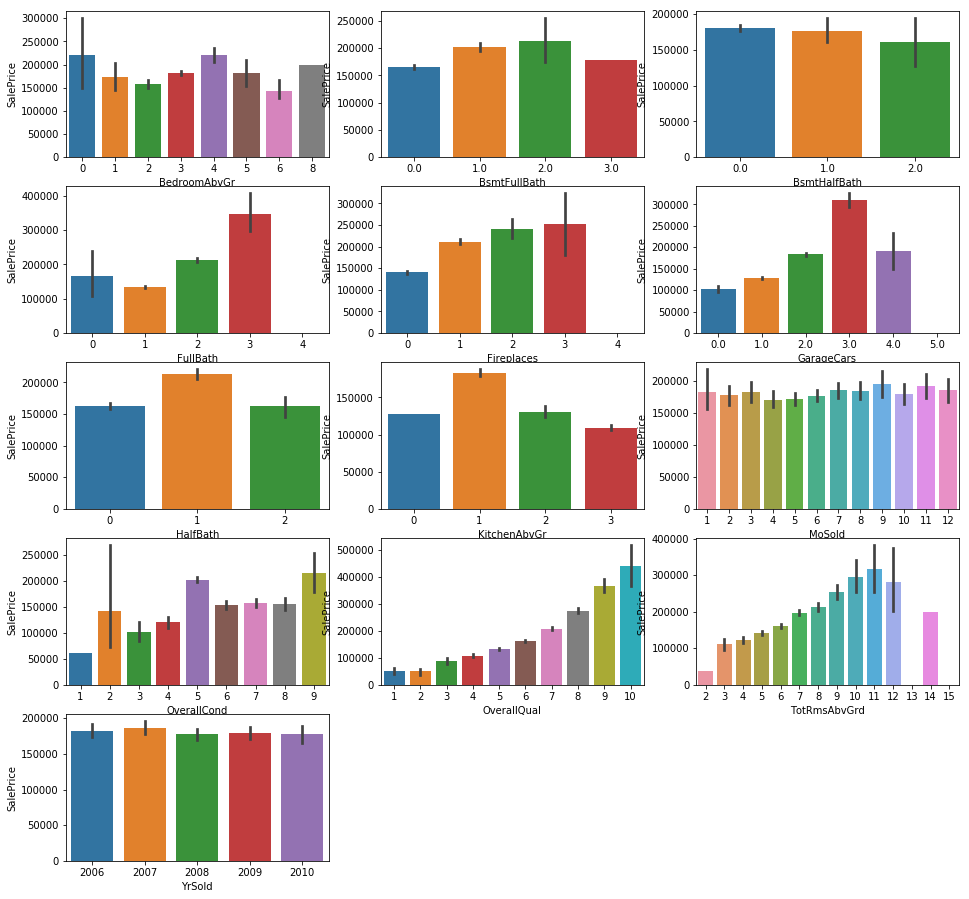

In [58]:
plt.figure(figsize = (16,48))
for idx,col in enumerate(num_cols_disc):
    plt.subplot(15,3,idx+1)
    sns.barplot(x=data[col], y=data['SalePrice'])
plt.show()

## Outliers
1. GrLivArea - 2 very large living areas with low sale prices. Likely to be agricultural land or something different. remove.


In [59]:
data=data.drop(data[(data['GrLivArea']>=4000) & (data['SalePrice']<=200000)].index)

## Feature Engineering

In [60]:
Neighborhoods=data.groupby('Neighborhood').agg({"SalePrice": ["mean",'median']})
Neighborhoods=Neighborhoods.SalePrice['median'].sort_values().to_frame()
Neighborhoods['Neigh_quantiles'] =pd.qcut(Neighborhoods['median'], 10, labels=False)
Neighborhoods

,median,Neigh_quantiles
Neighborhood,,
MeadowV,88000.0,0
IDOTRR,103000.0,0
BrDale,106000.0,0
OldTown,119000.0,1
Edwards,119500.0,1
BrkSide,124300.0,2
Sawyer,135000.0,2
Blueste,137500.0,2
SWISU,139500.0,3


In [61]:
data = pd.merge(data,
               Neighborhoods['Neigh_quantiles'].to_frame(),
               left_on='Neighborhood',
               right_index=True)

In [62]:
data=data.sort_index()
data=data.reset_index()
data=data.drop(['index'],axis=1)


Export the data to intermediate folder (read this in order to build model)

In [46]:
export = data[data['source']=='train']
export.to_csv('Intermediate/train.csv',index=False)

export = data[data['source']=='test']
export.to_csv('Intermediate/test.csv',index=False)

# Build Model

In [20]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\bhave\AppData\Local\Temp\tmpdrz3iucr
  JVM stdout: C:\Users\bhave\AppData\Local\Temp\tmpdrz3iucr\h2o_bhave_started_from_python.out
  JVM stderr: C:\Users\bhave\AppData\Local\Temp\tmpdrz3iucr\h2o_bhave_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Australia/Brisbane
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,3 months and 14 days !!!
H2O cluster name:,H2O_from_python_bhave_i9vnvw
H2O cluster total nodes:,1
H2O cluster free memory:,1.738 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [24]:
# train_hex = h2o.H2OFrame(data[data['source']=='train'])
train_hex =h2o.import_file("train.csv")

X_train_hex, X_valid_hex = train_hex.split_frame([0.7], seed=1234)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
X_names=list(train_hex.columns)
X_names.remove('Id')
X_names.remove('SalePrice')
X_names.remove('Neighborhood')
X_names.remove('source')
# Split data into Training & Test/Crossvalid

In [26]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm1 = H2OGradientBoostingEstimator(nfolds=5,
                                    categorical_encoding='one_hot_explicit',
                                    seed=1234)

In [27]:
gbm1.train(x=X_names,
              y='SalePrice',
              training_frame=X_train_hex,
              validation_frame=X_valid_hex)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
train_hex['gbm1'] =gbm1.predict(train_hex)
train_df=train_hex.as_data_frame()

gbm prediction progress: |████████████████████████████████████████████████| 100%


# Hyperparameter Tuning

In [152]:
# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01,0.03,0.05,0.075, 0.1],
                'max_depth': [3, 5, 9,12,20],
               'categorical_encoding': ['one_hot_explicit','sort_by_response'],
                'sample_rate': [0.4, 0.6],
                'col_sample_rate': [0.2, 0.5, 1.0]}



In [153]:
from h2o.grid.grid_search import H2OGridSearch
# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)

In [154]:

gbm_grid1.train(x=X_names,
                y='SalePrice',
                training_frame=X_train_hex,
                validation_frame=X_valid_hex,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [172]:
# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='rmsle', decreasing=False)
gbm_gridperf1

       categorical_encoding col_sample_rate learn_rate max_depth sample_rate  \
0            SortByResponse             0.2        0.1         5         0.4   
1            SortByResponse             0.2        0.1         9         0.4   
2            SortByResponse             0.5       0.05        12         0.4   
3            SortByResponse             0.2      0.075         9         0.4   
4            SortByResponse             0.2      0.075         5         0.4   
5            OneHotExplicit             0.5      0.075         5         0.4   
6            SortByResponse             0.2      0.075         5         0.6   
7            OneHotExplicit             1.0      0.075         9         0.4   
8            OneHotExplicit             0.2        0.1        12         0.4   
9            OneHotExplicit             0.2      0.075         9         0.6   
10           SortByResponse             0.2       0.05         9         0.4   
11           SortByResponse             

In [173]:
# Grab the top GBM model, chosen by validation AUC
best_gbm1 = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
train_hex['gbm1'] =best_gbm1.predict(train_hex)
train_df=train_hex.as_data_frame()

gbm prediction progress: |████████████████████████████████████████████████| 100%


# Model Validation / Performance

In [174]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses

     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)

def gini_normalized(a, p):
     return gini(a, p) / gini(a, a)

In [175]:
gini_normalized(train_df.SalePrice,train_df.gbm1)

0.9790874156696955

Here we have some functions to create actual vs expected plots. Create

In [162]:
def CreatePlot_cat(col,df):
    df = df.groupby(col).agg({"SalePrice": ["mean"],
                                    "gbm1":["mean"],
                                         "Id":["count"]}).reset_index()
    df.columns = df.columns.get_level_values(0)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df[col], df.SalePrice, color='blue')
    ax1.plot(df[col], df.gbm1, color='red')
    ax2.bar(df[col], df.Id, color='grey', alpha=0.3)
    plt.suptitle(col, fontsize=13, fontweight=0, color='black', y=1.02)
    plt.show()

def CreatePlot_cont_cut(col,df):
    df = train_df[[col,'SalePrice','gbm1','Id']]
    temp[col]=pd.cut(df[col], 8).astype(str).str.strip('()[]').str.replace(',', ' -')
    CreatePlot(col,temp)
    
def CreatePlot_cont_qcut(col,df):
    df = train_df[[col,'SalePrice','gbm1','Id']]
    temp[col]=pd.qcut(df[col], 8).astype(str).str.strip('()[]').str.replace(',', ' -')
    CreatePlot(col,temp)

In [176]:
train_df['gbm1_ntile']=pd.qcut(train_df['gbm1'], 20, labels=False)

### Categorical/Discrete Features

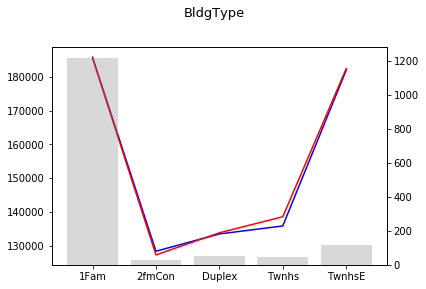

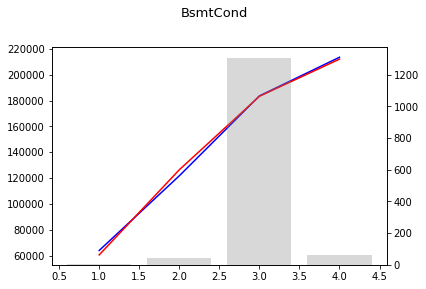

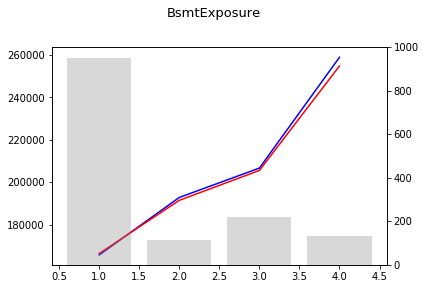

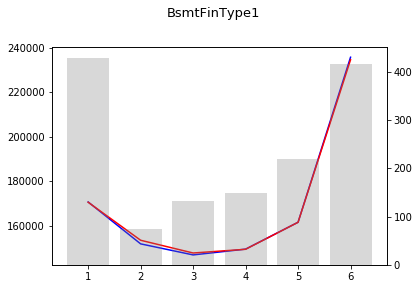

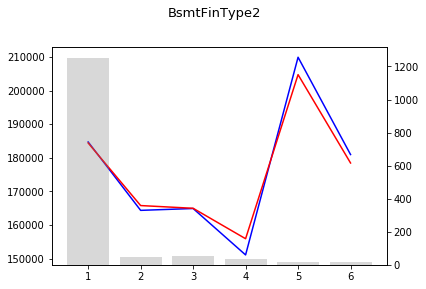

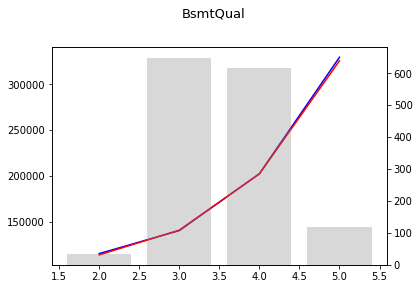

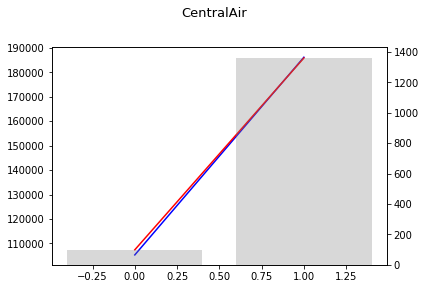

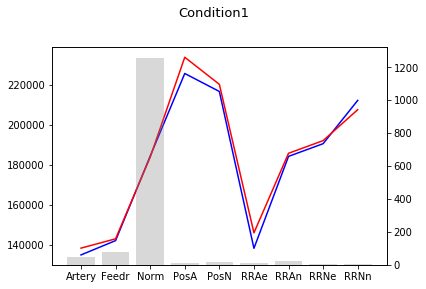

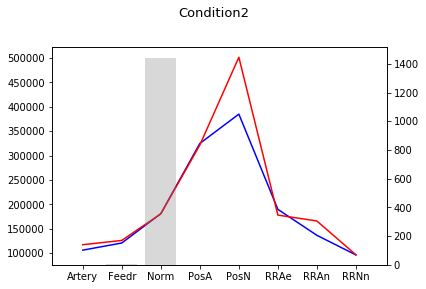

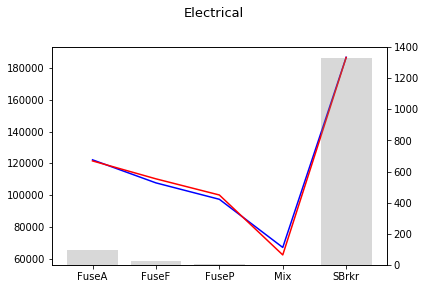

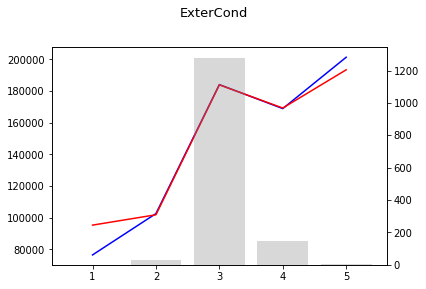

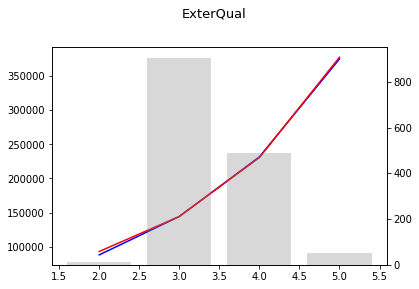

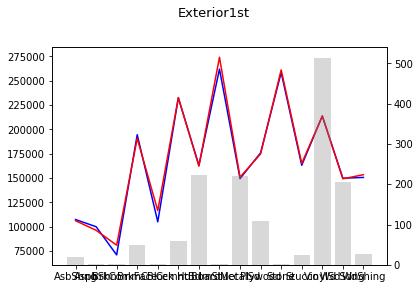

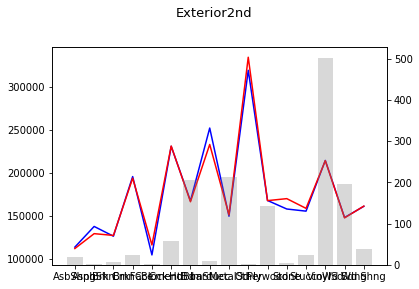

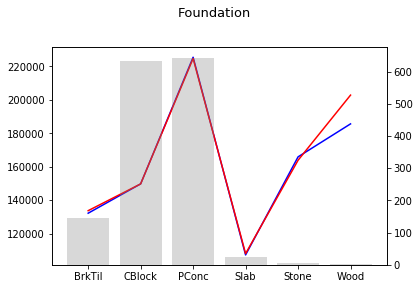

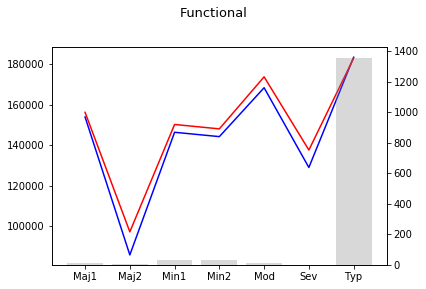

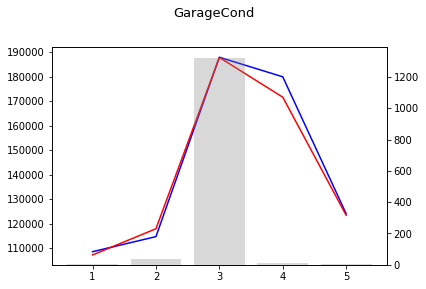

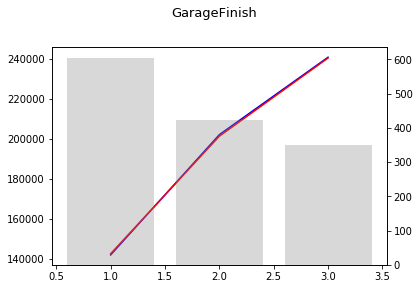

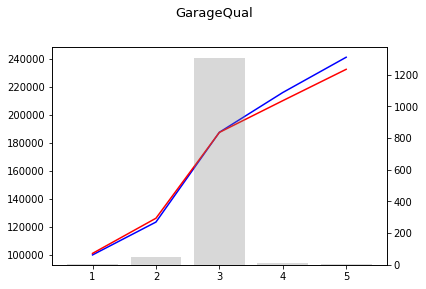

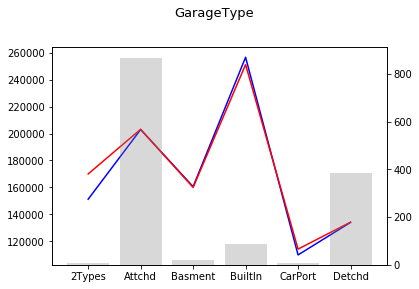

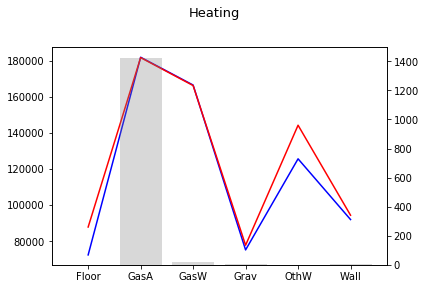

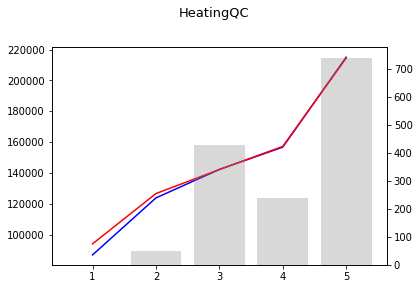

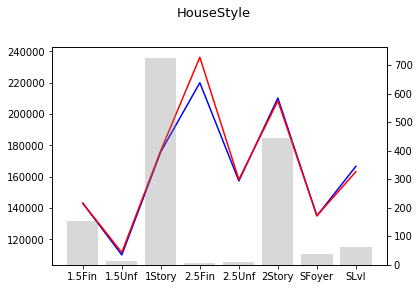

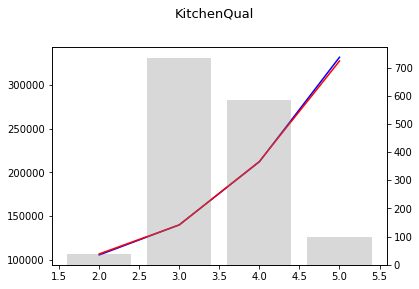

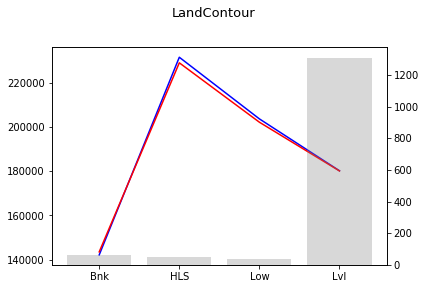

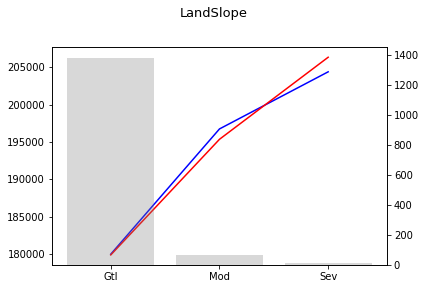

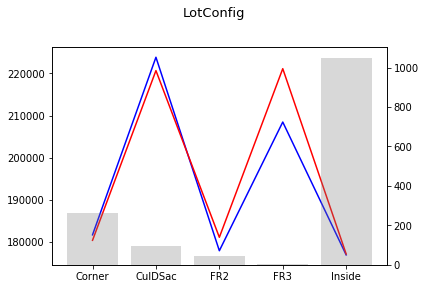

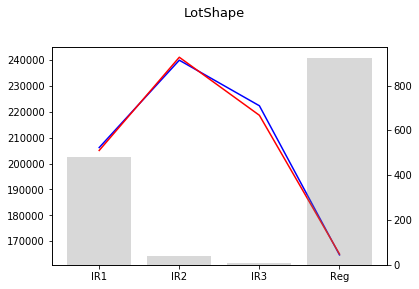

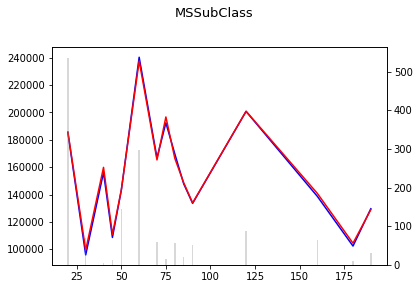

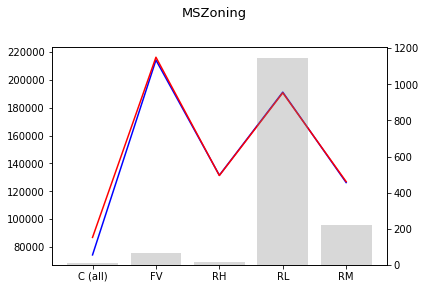

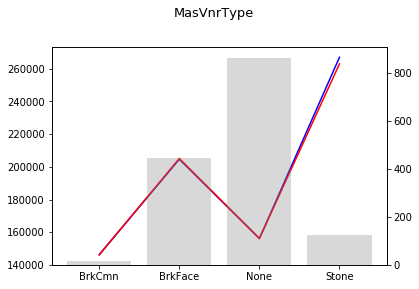

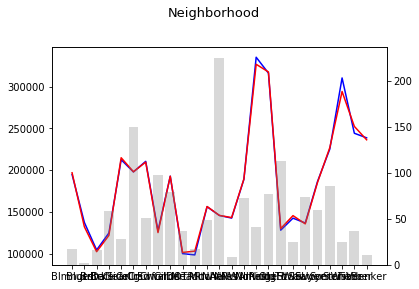

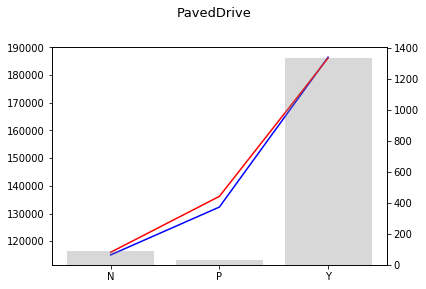

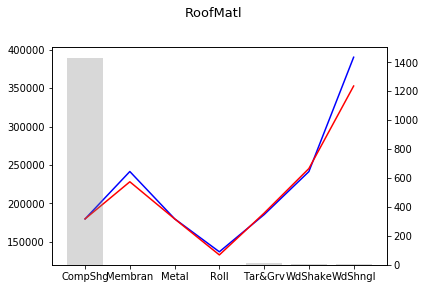

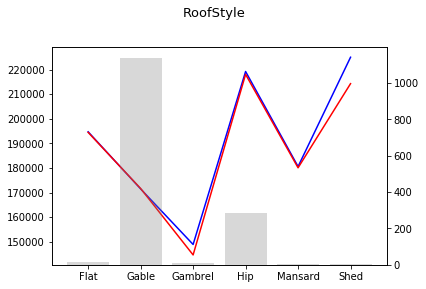

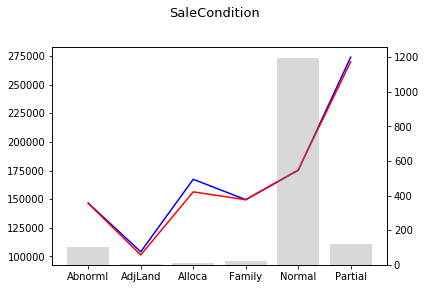

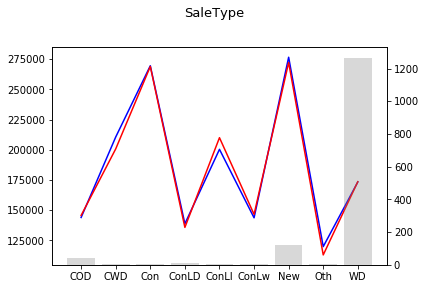

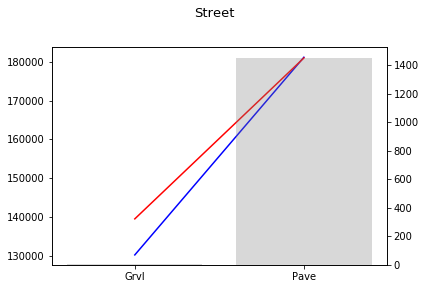

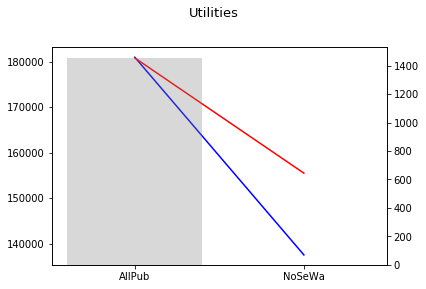

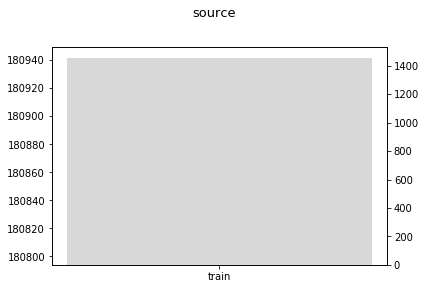

In [177]:
for idx,col in enumerate(cat_cols):
    CreatePlot(col,train_df)


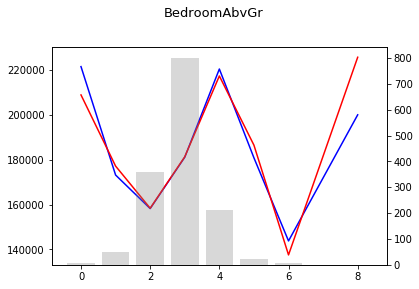

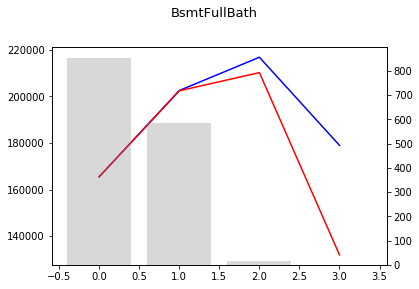

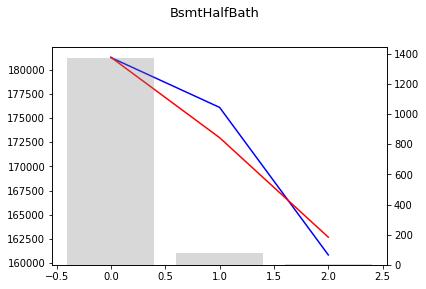

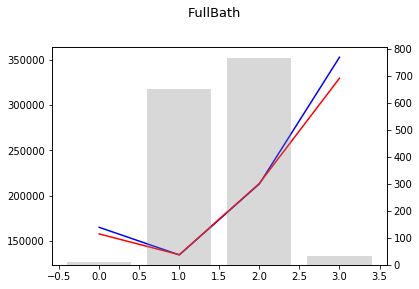

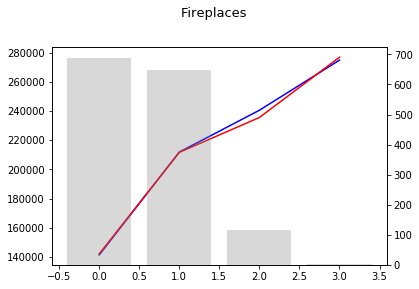

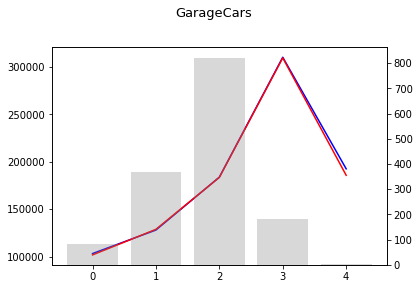

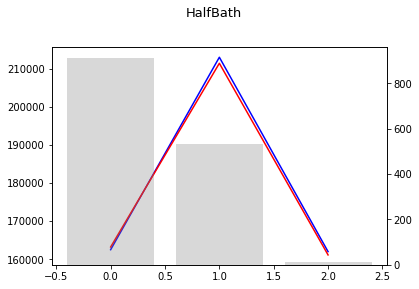

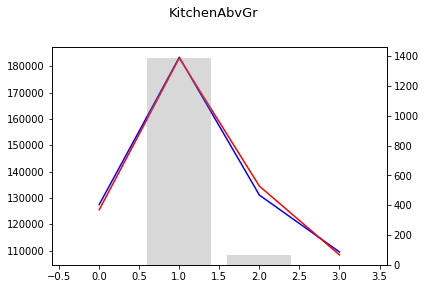

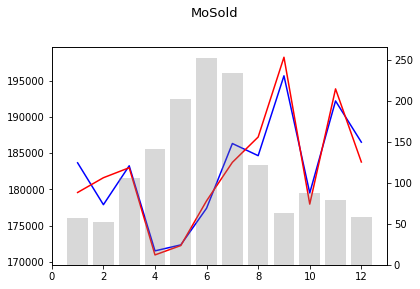

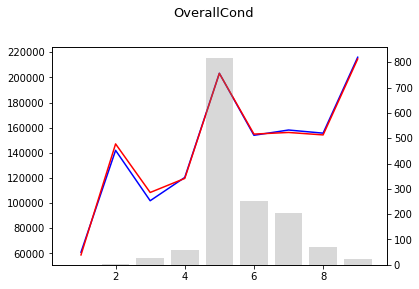

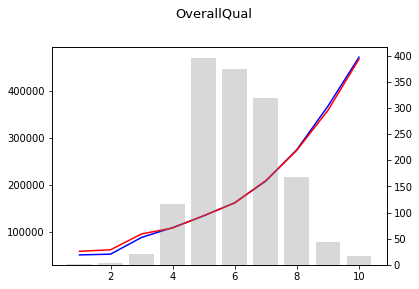

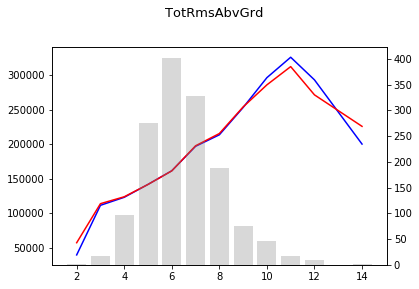

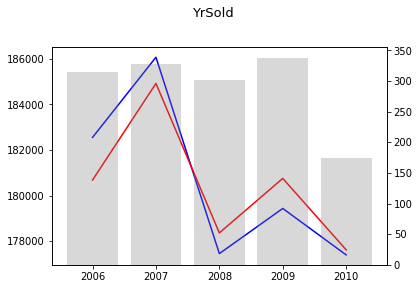

In [178]:
for idx,col in enumerate(num_cols_disc):
    CreatePlot(col,train_df)


### Continious Features

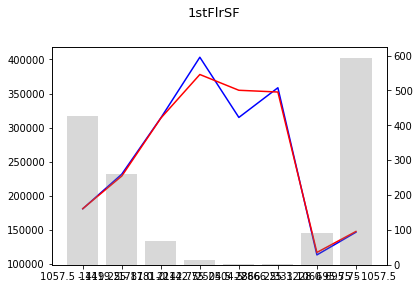

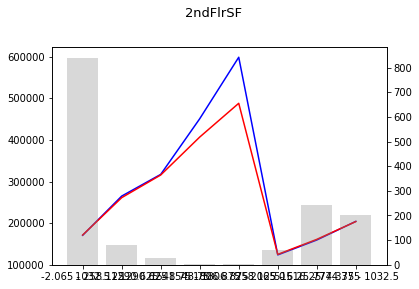

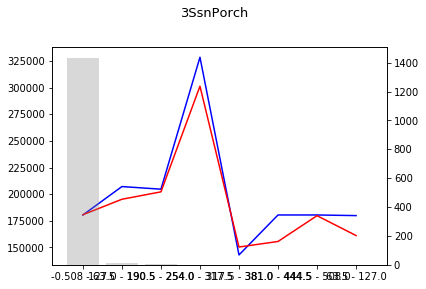

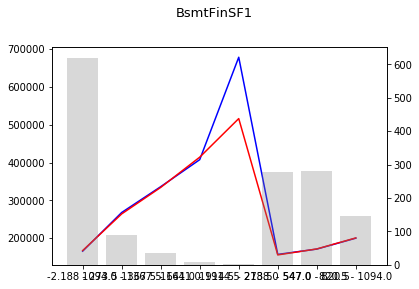

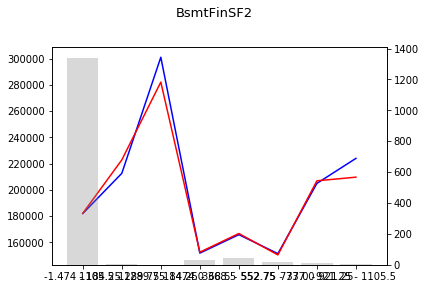

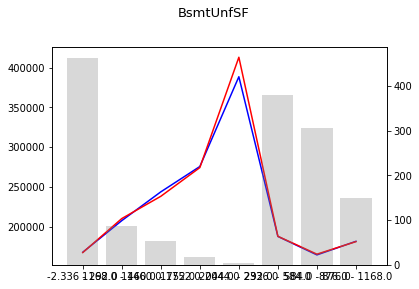

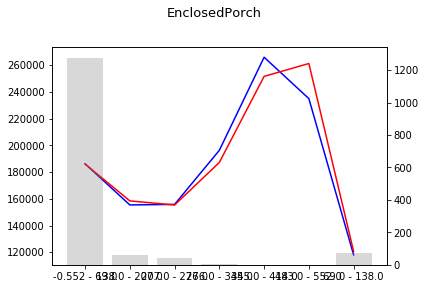

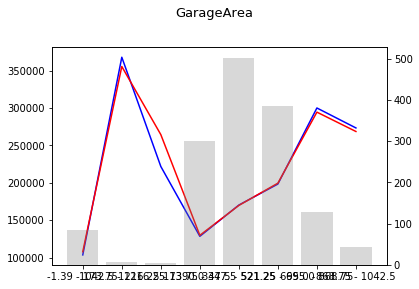

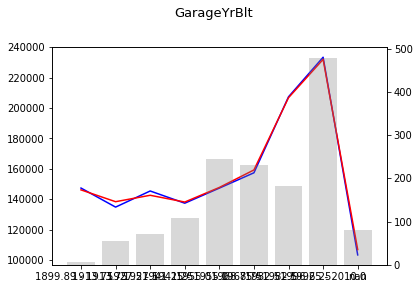

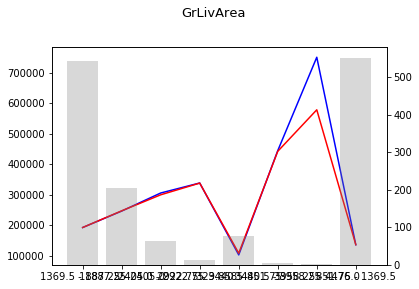

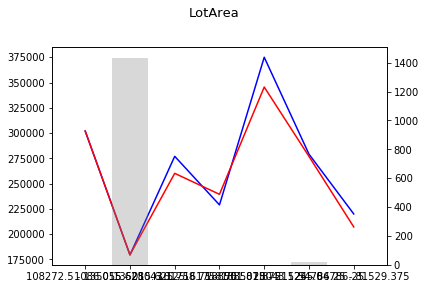

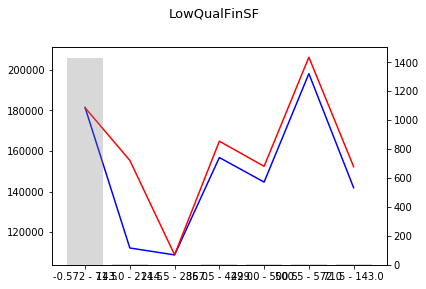

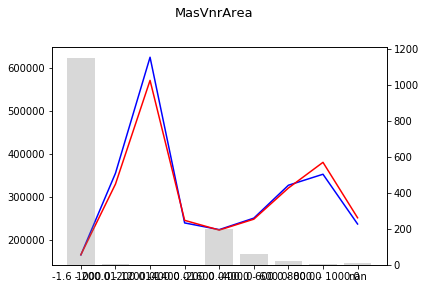

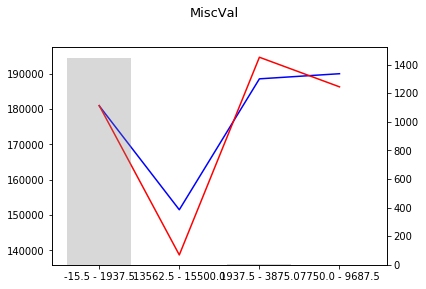

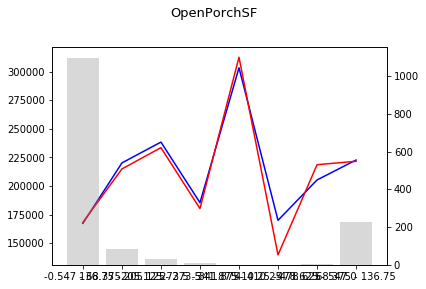

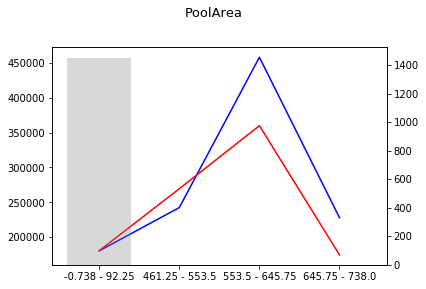

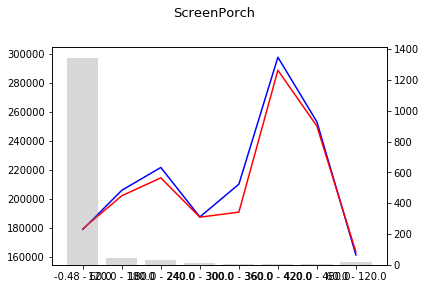

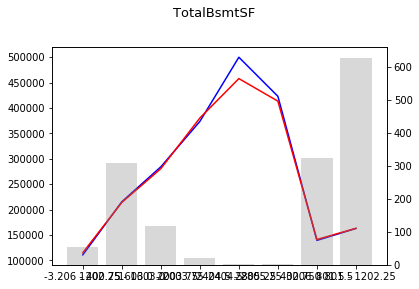

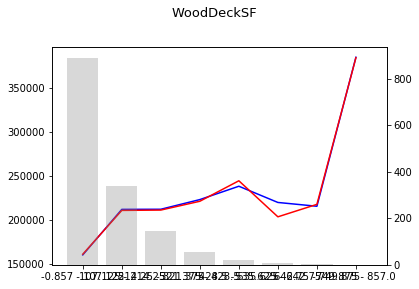

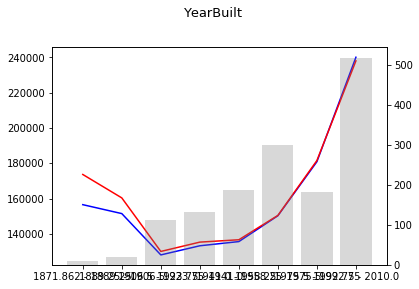

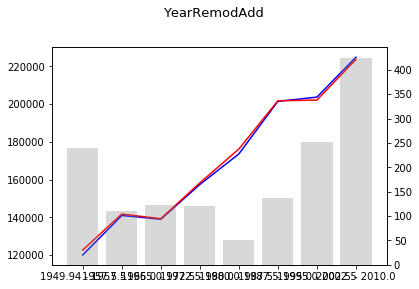

In [140]:
for idx,col in enumerate(num_cols_cont):
    CreatePlot_cont_cut(col,train_df)


In [141]:
# for idx,col in enumerate(num_cols_cont):
#     CreatePlot_cont_qcut(col,train_df)
# 

# Score Data


In [179]:
# train_hex = h2o.H2OFrame(data[data['source']=='train'])
test_hex =h2o.import_file("Intermediate/test.csv")



Parse progress: |█████████████████████████████████████████████████████████| 100%


In [180]:
test_hex['SalePrice'] = best_gbm1.predict(test_hex)


gbm prediction progress: |████████████████████████████████████████████████| 100%


In [181]:
submission = test_hex.as_data_frame()[['Id','SalePrice']]

In [182]:
submission.to_csv('submission/submission_1.csv',index=False)


In [ ]:
test.info()

In [ ]:
train.info()

In [ ]:
test_hex